<a href="https://colab.research.google.com/github/MuhammadHumair/MuhammadHumair/blob/main/Image_Steganography_using_LSB_technique_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

In [2]:
def messageToBinary(message):
  if type(message) == str:
    # get ascii code of the char using ord() and convert into binary
    return ''.join([ format(ord(i), "08b") for i in message ])
  elif type(message) == bytes or type(message) == np.ndarray:
    return [ format(i, "08b") for i in message ]
  elif type(message) == int or type(message) == np.uint8:
    return format(message, "08b")
  else:
    print("Invalid type for binary conversion.")


In [3]:
def encodeMessage():
  print("\nImage is Loading where to encode data...\n")
  msg = input("Enter your message which you want to hide: ")
  if len(msg) == 0:
    # Raise error into error window instead of showing simple message to user.
    raise ValueError("The message is empty which needs to be encoded.")
  # Reading static image using  OpenCV (Computer Vision Library)
  img = cv2.imread("MonaLisa.png")
  # Details of read image
  print("\nDetails about image are give below:")
  print(f"\nThe size of image is: {img.size} bytes")
  print(f"The shape of image is: {img.shape}\n")
  print("Image is shown below:\n")
  # Show image into jupyter after reading
  cv2_imshow(cv2.resize(img, (150,150)))
  print("\n\t\tEncoding...\n")
  # Encoding the message into image using steganography
  encoded_msg = hideData(img, msg)
  # After encoding write into image and save according to user defined file name.
  encoded_img_name = input("Enter image name with extension in which encoded data will save: ")
  if len(encoded_img_name) == 0:
    raise ValueError("The image name is empty where encoded image want to save.")
  cv2.imwrite(encoded_img_name, encoded_msg)
  print("\nCongrats!, secret message is successfully encoded in image.")

In [4]:
def decodeMessage():
  print("\nDecoded image is Loading from where to decode data...\n")
  en_img = cv2.imread("MonaLisa_Encoded.png")
  cv2_imshow(cv2.resize(en_img, (150,150)))
  decoded_img = showData(en_img)
  print(f"\nYour secret message is => {decoded_img}")

In [5]:
def hideData(image, secretMessage):
  # calculate the bytes to encode
  en_bytes = image.size // 8
  print(f"Maximum bytes to encode is {en_bytes}\n")
  # compare the length of the secret message
  if len(secretMessage) >= en_bytes:
    raise ValueError(f"The length of the secret message ({len(secretMessage)}) is bigger than from image ({en_bytes}). Needs bigger image.")
  
  # this string is used as delimiter to check where to stop looking when decoding
  secretMessage += "!@#$%"

  data_index = 0
  # convert secret message to binary
  binarySecretMessage = messageToBinary(secretMessage)
  # length of data which needs to be hide
  data_len = len(binarySecretMessage)

  # get pixel from image and merge with message
  for values in image:
    for pixel in values:
      # get the binary of red, green, and blue
      r, g, b = messageToBinary(pixel)
      if data_index < data_len:
        # update the bit on LSB on red pixel
        pixel[0] = int(r[:-1] + binarySecretMessage[data_index], 2)
        data_index += 1
      if data_index < data_len:
        # update the bit on LSB on green pixel
        pixel[1] = int(g[:-1] + binarySecretMessage[data_index], 2)
        data_index += 1
      if data_index < data_len:
        # update the bit on LSB on blue pixel
        pixel[2] = int(b[:-1] + binarySecretMessage[data_index], 2)
        data_index += 1
      if data_index >= data_len:
        break
  return image

In [6]:
def showData(image):
  binary_data = ""
  # get encoded bit from image's pixel
  for values in image:
    for pixel in values:
      r, g, b = messageToBinary(pixel)
      binary_data += r[-1]
      binary_data += g[-1]
      binary_data += b[-1]
  
  # make the pair of 8 bits for characters
  all_bytes_list = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
  # convert the bits into charaters
  decoded_data = ""
  for byte in all_bytes_list:
    decoded_data += chr(int(byte, 2))
    if decoded_data[-5:] == "!@#$%": # remove the delimiter
      break
  return decoded_data[:-5]

***** Image Steganography ***** 

1) Encode the data 

2) Decode the data 

Please enter choice from above menu: 2

Decoded image is Loading from where to decode data...



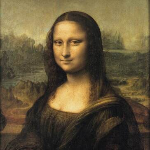


Your secret message is => It is Humair.


In [7]:
print("***** Image Steganography ***** \n")
print("1) Encode the data \n")
print("2) Decode the data \n")
option = int(input("Please enter choice from above menu: "))
if option == 1:
  encodeMessage()
elif option == 2:
  decodeMessage()
else:
  raise ValueError("\nYou entered a wrong choice. Please, try again!")